In [1]:
import numpy as np
import matplotlib.pyplot as plt
from scipy.optimize import minimize

%matplotlib inline
plt.rcParams['figure.figsize'] = (10.0, 7.0)
np.set_printoptions(suppress=True) # Don't print scietific numbers form

# 1. Logistic regression

In [2]:
data1 = np.loadtxt('ex2/ex2data1.txt', delimiter = ',' )

# preparing the design matrix and labels vector
X = np.c_[np.ones(data1.shape[0]), data1[:,0:2]] 
y = np.c_[data1[:,2]]

m = X.shape[0] # number of training examples
n = X.shape[1] # number of features

In [3]:
# preparing the weights vector
#theta = np.zeros(n).reshape(n,1)
theta = np.zeros(n)
print( X.shape, '*', theta.shape, '=?', y.shape )

(100, 3) * (3,) =? (100, 1)


1.1 Visualizing the data

In [4]:
def plot_dataset( X, y, xlabel, ylabel, pos_label, neg_label, xmin, xmax, ymin, ymax, axes = None ):

    pos = y[:,0] == 1
    neg = y[:,0] == 0

    if axes == None:
        axes = plt.gca()

    axes.scatter(X[pos][:,1], X[pos][:,2], marker='+', c='k', s=50, linewidth=2, label=pos_label)
    axes.scatter(X[neg][:,1], X[neg][:,2], marker='o', c='y', s=50, label=neg_label)
    
    axes.set_xlim([xmin, xmax])
    axes.set_ylim([ymin, ymax])

    axes.set_xlabel(xlabel, fontsize = 13)
    axes.set_ylabel(ylabel, fontsize = 13)

    axes.legend( bbox_to_anchor=(1.0, 1.0),  fancybox = True ) # scatterpoints = 1 set in matplotlibrc

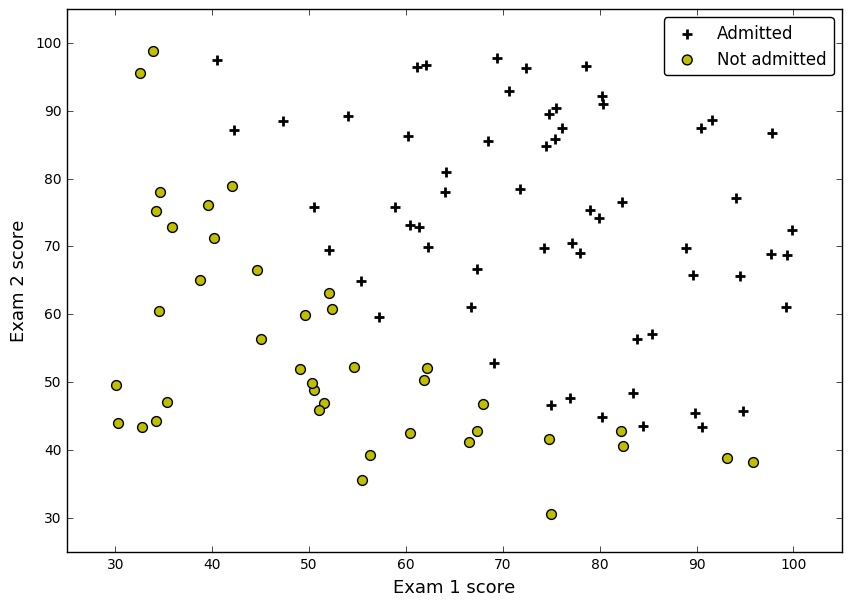

In [5]:
plot_dataset( X, y, 'Exam 1 score', 'Exam 2 score', 'Admitted', 'Not admitted', 25, 105, 25, 105 )

1.2 Implementation

1.2.1 Warmup exercise: sigmoid function.

See discussion regarding performance in: http://stackoverflow.com/questions/3985619/how-to-calculate-a-logistic-sigmoid-function-in-python

In [6]:
def sigmoid(x):
    return 1 / ( 1 + np.exp(-x) )

1.2.2 Cost function gradient

The cost function J:
 $$ J(\theta) = \frac{1}{m}\sum_{i=1}^{m}\big[-y^{(i)}\, log\,( h_\theta\,(x^{(i)}))-(1-y^{(i)})\,log\,(1-h_\theta(x^{(i)}))\big] = $$ 

$$= -\frac{1}{m}\big((\,y^T log\,(g(X\cdot \theta))+(\,(1-y)^T log\,(1-g(X\theta))\big)$$

Gradient of J:

$$ \frac{\partial J(\theta)}{\partial\theta_{j}} = \frac{1}{m}\sum_{i=1}^{m} ( h_\theta (x^{(i)})-y^{(i)})x^{(i)}_{j}$$
$$ \implies \frac{1}{m} (g(X\cdot \theta)-y)^T X$$

In [7]:
def cost_function( theta, X, y ):
    m = X.shape[0]
    H = X.dot(theta)
    h = sigmoid(H)
    
    J = (-1/m) * ( y.T.dot( np.log(h) ) + (1 - y.T).dot( np.log( 1 - h ) ) )
    
    #grad = (1/m) * (h - y).T.dot( X )
    #print(grad.T.flatten().shape, 'grad flatten shape')

    if np.isnan(J[0]):
        return(np.inf)
    return ( J[0] )
    #return  J[0][0], grad.T.flatten()
    #return val, jac

In [8]:
def gradient( theta, X, y ):
    theta = np.array(theta).reshape(3,1)
    m = X.shape[0]
    H = np.dot(X, theta)
    h = sigmoid(H)

    grad = (1/m) * (h - y).T.dot( X )
    return grad.T.flatten()

In [9]:
J = cost_function(theta, X, y)
grad = gradient( theta, X, y )
print( J )
print( grad )

0.69314718056
[ -0.1        -12.00921659 -11.26284221]


1.2.3 Learning parameters using scipy.optimize.minimize with default method

In [10]:
# minimize(fun, x0[, args, method, jac, hess, ...]) performs a minimization of scalar function of one or more variables.
logistic_regression = minimize( fun = cost_function, x0 = theta, 
                               args = (X, y), jac = gradient, options = {'maxiter' : 400} )
print(logistic_regression)

      fun: 0.20349770158950986
 hess_inv: array([[ 2853.39492941,   -23.29088235,   -22.74164702],
       [  -23.29088235,     0.20448913,     0.17296952],
       [  -22.74164702,     0.17296952,     0.19617032]])
      jac: array([-0.        ,  0.00000044, -0.0000014 ])
  message: 'Optimization terminated successfully.'
     nfev: 34
      nit: 25
     njev: 30
   status: 0
  success: True
        x: array([-25.16131634,   0.2062316 ,   0.20147143])


/usr/local/lib/python3.6/site-packages/ipykernel/__main__.py:6: RuntimeWarning: divide by zero encountered in log
/usr/local/lib/python3.6/site-packages/ipykernel/__main__.py:6: RuntimeWarning: divide by zero encountered in log


1.2.4 Evaluating logistic regression

In [11]:
def predict( theta, X, threshold = 0.5 ):
    p = sigmoid( X.dot(theta) ) >= threshold
    return p.astype('int') 

In [12]:
#For a student with an Exam 1 score of 45 and an Exam 2 score of 85, 
#you should expect to see an admission probability of 0.776.
print( 'For a student with scores 45 and 85, we predict an admission probability of ',\
      np.round(sigmoid( np.array([1, 45, 85]).dot(logistic_regression.x) ), 3) )
print( 'The prediction for the above student is (1-pos, 0-neg):',\
      predict( logistic_regression.x, np.array([1, 45, 85]) ) )

For a student with scores 45 and 85, we predict an admission probability of  0.776
The prediction for the above student is (1-pos, 0-neg): 1


In [13]:
# Calculating the training score
np.set_printoptions(suppress=True) # Don't print scietific numbers form
p = predict(logistic_regression.x, X) 
print('Training score = {0}%'.format( 100 * sum(p == y.ravel())/p.size ))

Training score = 89.0%


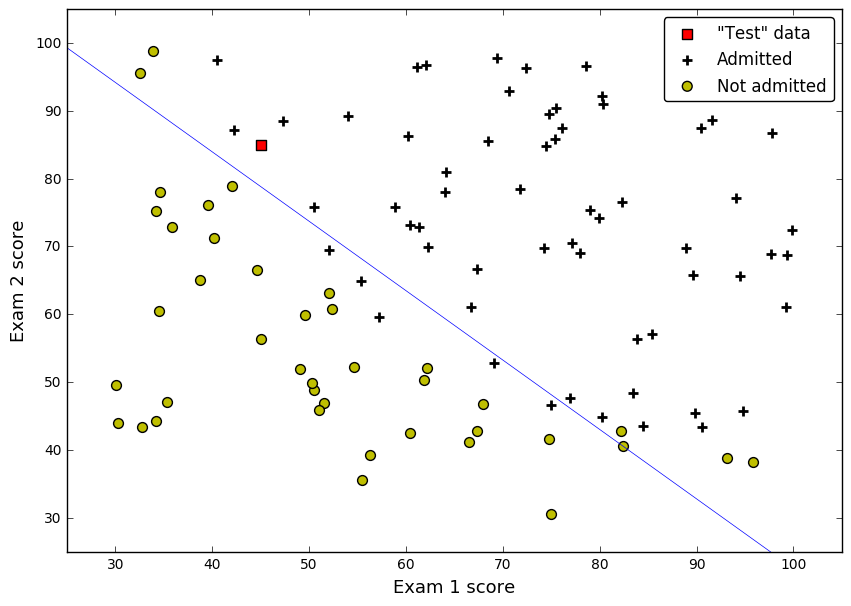

In [14]:
# Plot the descision boundary
plt.scatter( 45, 85, s=50, c='r', marker='s', label='"Test" data' )
plot_dataset( X, y, 'Exam 1 score', 'Exam 2 score', 'Admitted', 'Not admitted', 25, 105, 25, 105 )

xx1, xx2 = np.meshgrid(np.linspace(0, 100), np.linspace(0, 100))
# Grid of all points (2500 by default) in the mesh, with entry of 1 in front ( for theta0 )
X_grid = np.c_[ np.ones( (np.ravel(xx1).shape[0], 1) ), np.ravel(xx1), np.ravel(xx2) ]
h = sigmoid( X_grid.dot(logistic_regression.x) )
h = h.reshape(xx1.shape)

plt.contour(xx1, xx2, h, [0.5], linewidths=0.5, colors='b')

# 2 Regularized logistic regression

2.1 Visualizing the data

In [15]:
data2 = np.loadtxt('ex2/ex2data2.txt', delimiter = ',' )

# preparing the design matrix and labels vector
X2 = np.c_[np.ones(data2.shape[0]), data2[:,0:2]] 
y2 = np.c_[data2[:,2]]

m = X2.shape[0] # number of training examples
n = X2.shape[1] # number of features

In [16]:
# preparing the weights vector
theta2 = np.zeros(n)
print( X2.shape, '*', theta2.shape, '=?', y2.shape )

(118, 3) * (3,) =? (118, 1)


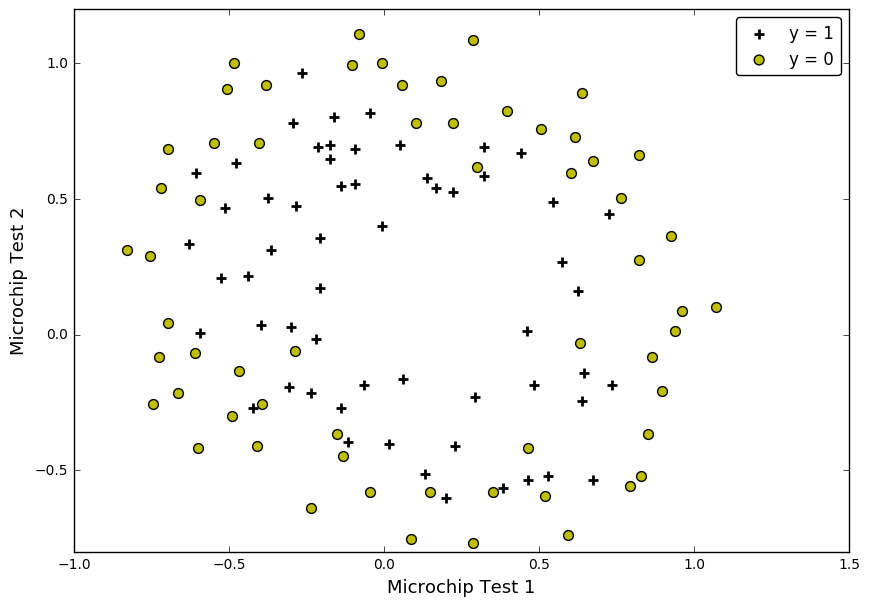

In [17]:
plot_dataset( X2, y2, 'Microchip Test 1', 'Microchip Test 2', 'y = 1', 'y = 0', -1.0, 1.5, -0.8, 1.2 )

2.2 Feature mapping

In [18]:
def poly_features( X, deg ):
    x1 = X[:,1]
    x2 = X[:,2]
    X_poly_features = X
    for i in range(2, deg+1):
        for j in range(0,i+1):
            X_poly_features = np.c_[X_poly_features, x1**(i-j) * x2**j]  
    return X_poly_features

In [19]:
X_poly_features = poly_features(X2, 6)

2.3 Cost function and gradient

Regularized Cost Function

$$ J(\theta) = \frac{1}{m}\sum_{i=1}^{m}\big[-y^{(i)}\, log\,( h_\theta\,(x^{(i)}))-(1-y^{(i)})\,log\,(1-h_\theta(x^{(i)}))\big] + \frac{\lambda}{2m}\sum_{j=1}^{n}\theta_{j}^{2}$$

Vectorized Cost Function

$$ J(\theta) = -\frac{1}{m}\big(( y^T\,log\,(g(X\theta))+((1-y)^T\,log\,(1-g(X\theta))\big) + \frac{\lambda}{2m}\sum_{j=1}^{n}\theta_{j}^{2}$$

Partial derivative

$$ \frac{\partial J(\theta)}{\partial\theta_{j}} = \frac{1}{m}\sum_{i=1}^{m} ( h_\theta (x^{(i)})-y^{(i)})x^{(i)}_{j} + \frac{\lambda}{m}\theta_{j}$$ 
Vectorized
$$ \frac{\partial J(\theta)}{\partial\theta_{j}} = \frac{1}{m} (g(X\theta)-y)^T X + \frac{\lambda}{m}\theta_{j}$$

$$ \text{Note that you should not regularize the parameter} ~\theta_0 ~\text{!}$$

In [20]:
def reg_cost_function( theta, X, y, lmda ):  # lmda, *args ):
    m = X.shape[0]
    H = np.dot(X, theta)
    h = sigmoid(H)

    J = (-1/m) * ( y.T.dot( np.log(h) ) + (1 - y.T).dot( np.log( 1 - h ) ) ) + ( lmda/(2*m) ) * np.sum( np.square(theta[1:]) )

    if np.isnan(J[0]):
        return(np.inf)
    return ( J[0] )

In [21]:
def reg_gradient( theta, X, y, lmda ): #lmda, *args ):
    n = X.shape[1]
    theta = np.array(theta).reshape(n,1)
    m = X.shape[0]
    H = np.dot(X, theta)
    h = sigmoid(H)
    # No summation this time, need to add theta0
    grad = ((1/m) * (h - y).T.dot( X )).T + (lmda/m) * np.r_[ [[0]], theta[1:] ] 
    return grad.flatten()

In [22]:
theta_reg = np.zeros( X_poly_features.shape[1] )
reg_cost_function( theta_reg, X_poly_features, y2, 1 )

0.69314718055994529

2.3.1 Learning parameters using fminunc

In [23]:
reg_logistic_regression = minimize( fun = reg_cost_function, x0 = theta_reg, 
                                   args = (X_poly_features, y2, 1), jac = reg_gradient, 
                                   options = {'maxiter' : 400} )

In [24]:
# Uncomment to see the output of the minimization:
#print( reg_logistic_regression )

2.4 Plotting the decision boundary

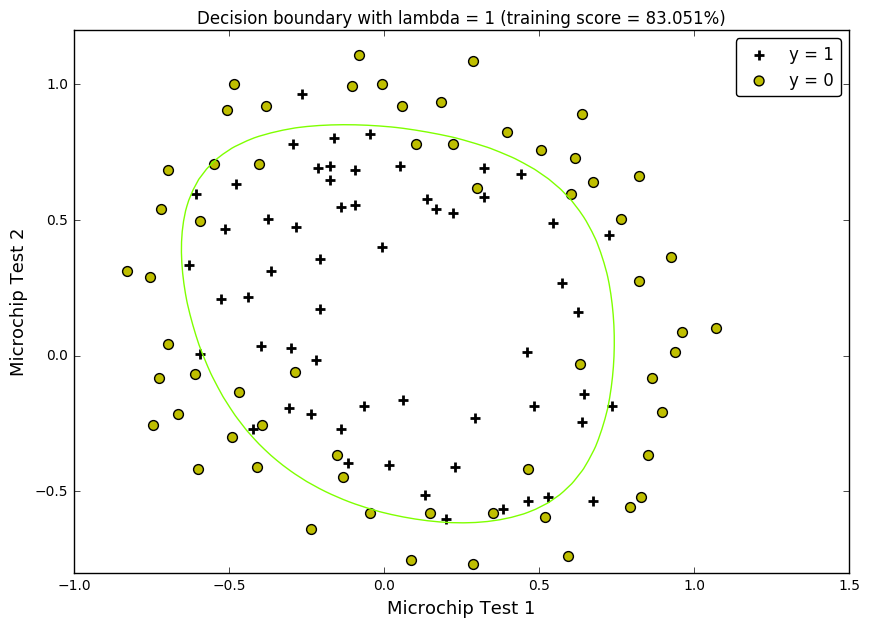

In [25]:
x1_min, x1_max = X2[:,1].min(), X2[:,1].max()
x2_min, x2_max = X2[:,2].min(), X2[:,2].max()
xx1, xx2 = np.meshgrid(np.linspace(x1_min, x1_max), np.linspace(x2_min, x2_max))
# Grid of all points (2500 by default) in the mesh, with entry of 1 in front ( for theta0 )
X_grid = poly_features( np.c_[ np.ones( (np.ravel(xx1).shape[0], 1) ), np.ravel(xx1), np.ravel(xx2) ], 6 )
h = sigmoid( X_grid.dot(reg_logistic_regression.x) )
h = h.reshape(xx1.shape)

p = predict( reg_logistic_regression.x, X_poly_features)
training_score = round( 100*sum(p == y2.ravel())/p.size, 3)
#print('Training score = {}%'.format(training_score))

plot_dataset( X2, y2, 'Microchip Test 1', 'Microchip Test 2', 'y = 1', 'y = 0', -1.0, 1.5, -0.8, 1.2 )
plt.contour(xx1, xx2, h, [0.5], linewidths=1, colors='chartreuse')
plt.title('Decision boundary with lambda = 1 (training score = {}%)'.format(training_score))

2.5 Optional exercises

/usr/local/lib/python3.6/site-packages/ipykernel/__main__.py:2: RuntimeWarning: overflow encountered in exp
  from ipykernel import kernelapp as app


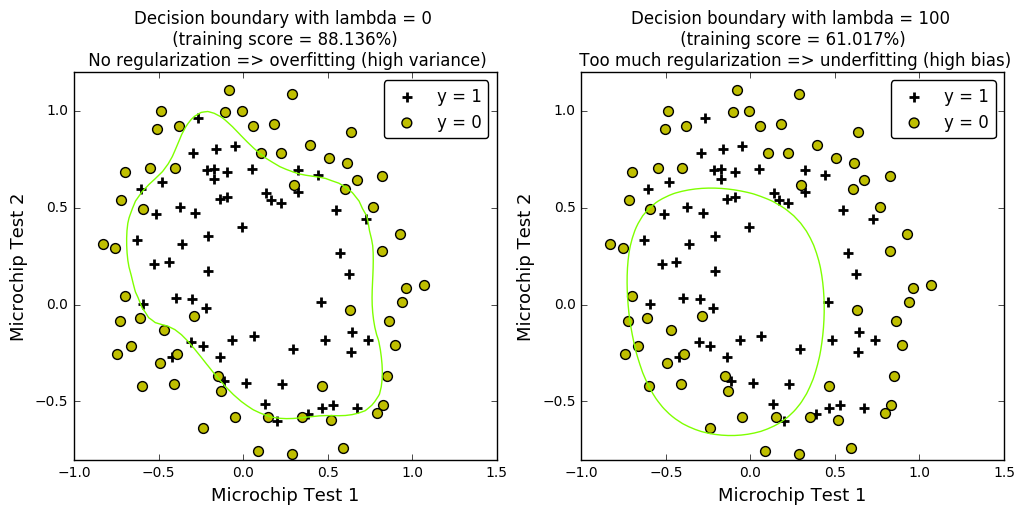

In [26]:
fig, axes = plt.subplots(1, 2, figsize=(12,5))

for i, l in enumerate([0,100]):
    reg_logistic_regression = minimize( fun = reg_cost_function, x0 = theta_reg, 
                                   args = (X_poly_features, y2, l), jac = reg_gradient, 
                                   options = {'maxiter' : 400} )
    h = sigmoid( X_grid.dot(reg_logistic_regression.x) )
    h = h.reshape(xx1.shape)

    p = predict( reg_logistic_regression.x, X_poly_features)
    training_score = round( 100*sum(p == y2.ravel())/p.size, 3)
    #print('Training score = {}%'.format(training_score))

    plot_dataset( X2, y2, 'Microchip Test 1', 'Microchip Test 2', 'y = 1', 'y = 0', -1.0, 1.5, -0.8, 1.2, axes[i] )
    axes[i].contour(xx1, xx2, h, [0.5], linewidths=1, colors='chartreuse')
    title = ['No regularization => overfitting (high variance)', 'Too much regularization => underfitting (high bias)']
    axes[i].set_title('Decision boundary with lambda = {0} \n (training score = {1}%) \n {2}'.format(l, training_score, title[i]))